In [1]:
#导入库
from cylib.qmtdata.cyxtdata import xtdata  
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
start_date = '2004-06-1'
end_date = '2024-6-23'

In [3]:
pd.set_option('display.max_rows', 5)

### 股票

In [4]:
st_path = '权益-股票.xlsx'
df_st = pd.read_excel(st_path, engine='openpyxl')
df_st.index = df_st['指标名称']
df_st = df_st.rename_axis('stocks', axis='index')
df_st = df_st.drop(df_st.columns[0], axis=1)
df_st = df_st[(df_st.index >= start_date) & (df_st.index <= end_date)]
df_st = df_st.iloc[::21]
df_st 

,申万行业指数:农林牧渔,申万行业指数:基础化工,申万行业指数:钢铁,申万行业指数:有色金属,申万行业指数:电子,申万行业指数:汽车,申万行业指数:家用电器,申万行业指数:食品饮料,申万行业指数:纺织服饰,申万行业指数:轻工制造,...,申万行业指数:电力设备,申万行业指数:机械设备,申万行业指数:国防军工,申万行业指数:计算机,申万行业指数:传媒,申万行业指数:通信,申万行业指数:煤炭,申万行业指数:石油石化,申万行业指数:环保,申万行业指数:美容护理
stocks,,,,,,,,,,,,,,,,,,,,,
2004-06-01,692.49,1083.87,1488.47,1075.53,985.30,1294.87,671.84,993.28,989.10,864.38,...,915.25,303.58,224.48,733.82,257.66,881.36,1071.21,1541.16,990.37,775.94
2004-06-30,584.32,971.81,1376.02,910.68,820.39,1080.28,622.72,861.17,851.07,745.23,...,774.26,262.80,194.39,606.84,218.82,763.38,942.80,1419.23,835.91,655.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-16,2824.82,3450.21,2138.69,4725.79,3271.77,5615.24,8157.99,19553.87,1540.77,2112.37,...,6555.86,1385.49,1280.47,3478.21,574.20,2390.73,3138.12,2412.24,1571.86,4811.34
2024-06-17,2619.41,3159.39,1926.92,4352.09,3511.88,5477.81,7617.26,17656.79,1384.80,1812.78,...,6293.86,1296.90,1277.96,3324.88,521.10,2421.36,3223.13,2293.00,1447.25,4329.15


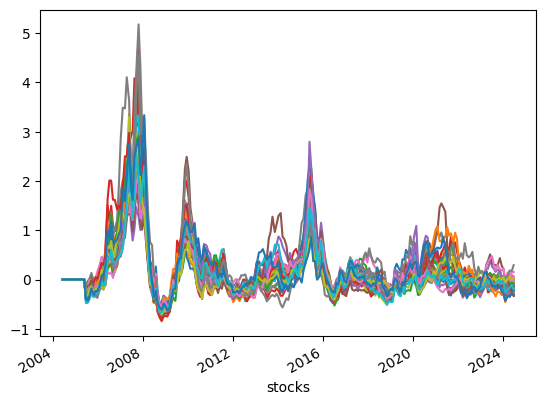

In [5]:
#环比
styoy_0 = df_st.pct_change(12)
styoy = styoy_0.fillna(0)

# 绘制图表
ax = styoy.plot().legend().set_visible(False)

Text(0.5, 0, '')

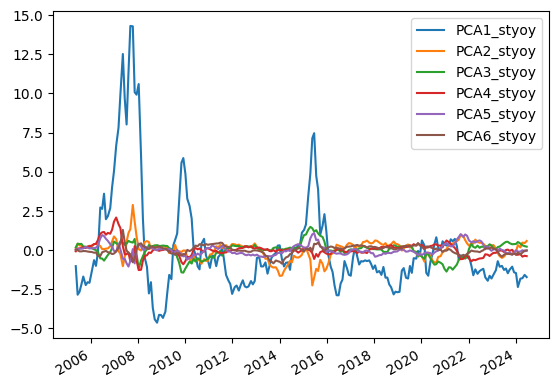

In [6]:
#pca股票环比
data_array = styoy.to_numpy()
#NaN,inf->0
data_array[np.isinf(data_array)] = 0
pca_styoy = PCA(n_components=6)
pca_styoy.fit(data_array)
transformed_data = pca_styoy.transform(data_array)

#DataFrame
pca_styoy_df = pd.DataFrame(transformed_data, index=styoy.index, columns=['PCA1_styoy', 'PCA2_styoy', 'PCA3_styoy', 'PCA4_styoy', 'PCA5_styoy', 'PCA6_styoy'])
pca_styoy_df = pca_styoy_df.iloc[11:]
#图
pca_styoy_df.plot().set_xlabel('')

### 其他资产

In [7]:
#债券
de_path = '债券1forPCA.xlsx'
df_de = pd.read_excel(de_path, engine='openpyxl')
df_de.index = df_de['Unnamed: 0']
df_de = df_de.drop(df_de.columns[0], axis=1)
df_de = df_de.loc[df_st.index]
#df_de = df_de[(df_de.index >= start_date) & (df_de.index <= end_date)]
#df_de = df_de.iloc[::22]

#环比
deyoy_0 = df_de.pct_change(12)
deyoy = deyoy_0.fillna(0)

#pca股票环比
data_array = deyoy.to_numpy()
#NaN,inf->0
data_array[np.isinf(data_array)] = 0
pca_deyoy = PCA(n_components=6)
pca_deyoy.fit(data_array)
transformed_data = pca_deyoy.transform(data_array)
#DataFrame
pca_deyoy_df = pd.DataFrame(transformed_data, index=deyoy.index, columns=['PCA1_deyoy', 'PCA2_deyoy', 'PCA3_deyoy', 'PCA4_deyoy', 'PCA5_deyoy', 'PCA6_deyoy'])
pca_deyoy_df = pca_deyoy_df.iloc[11:]

<Axes: xlabel='stocks'>

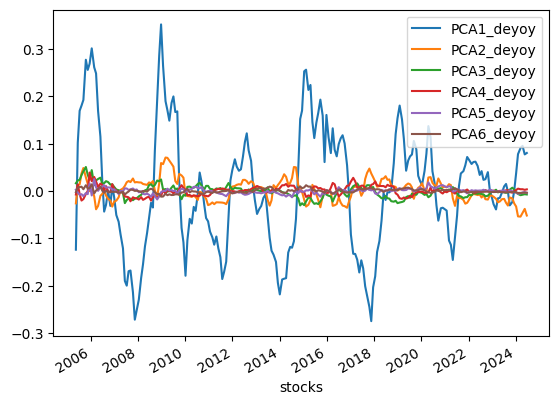

In [8]:
pca_deyoy_df.plot()

In [9]:
#商品
gd_path = '南华商品指数.xlsx'
df_gd = pd.read_excel(gd_path, engine='openpyxl')
df_gd.index = df_gd['指标名称']
df_gd = df_gd.rename_axis('goods', axis='index')
df_gd = df_gd.drop(df_gd.columns[0], axis=1)
df_gd = df_gd.loc[df_st.index]
#df_gd = df_gd[(df_gd.index >= start_date) & (df_gd.index <= end_date)]
#df_gd = df_gd.iloc[::21]
#删除一些数据
columns_to_drop = [col for col in df_gd.columns if df_gd[col].iloc[0] == 0]
df_gd = df_gd.drop(columns=columns_to_drop)
#环比
gdyoy_0 = df_gd.pct_change(12)
gdyoy = gdyoy_0.fillna(0)

#pca股票环比
data_array = gdyoy.to_numpy()
#NaN,inf->0
data_array[np.isinf(data_array)] = 0
pca_gdyoy = PCA(n_components=6)
pca_gdyoy.fit(data_array)
transformed_data = pca_gdyoy.transform(data_array)
#DataFrame
pca_gdyoy_df = pd.DataFrame(transformed_data, index=gdyoy.index, columns=['PCA1_gdyoy', 'PCA2_gdyoy', 'PCA3_gdyoy', 'PCA4_gdyoy', 'PCA5_gdyoy', 'PCA6_gdyoy'])
pca_gdyoy_df = pca_gdyoy_df.iloc[11:]

<Axes: xlabel='stocks'>

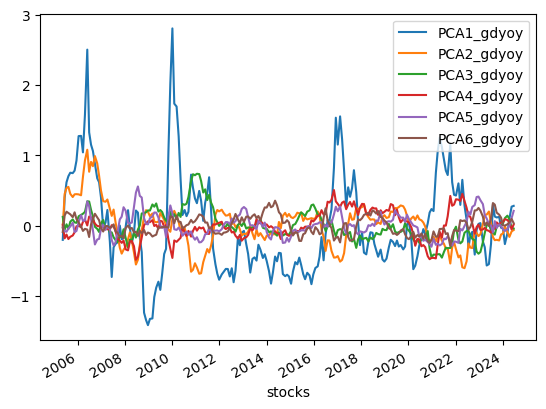

In [10]:
pca_gdyoy_df.plot()

In [11]:
#跨境
cr_path = '海外权益.xlsx'
df_cr = pd.read_excel(cr_path, engine='openpyxl')
df_cr.index = df_cr['指标名称']
df_cr = df_cr.rename_axis('cross', axis='index')
df_cr = df_cr.drop(df_cr.columns[0], axis=1)

#删除一些数据
df_cr = df_cr.drop(df_cr.columns[8], axis=1)
#df_cr = df_cr[(df_cr.index >= start_date) & (df_cr.index <= end_date)]
#df_cr = df_cr.iloc[::29]
df_cr = df_cr.loc[df_st.index]
#补全数据
df_cr.replace(0, np.nan, inplace=True)# 将所有的0替换为NaN
df_cr.fillna(method='bfill', inplace=True)# 向前填充NaN值

#环比
cryoy_0 = df_cr.pct_change(12)
cryoy = cryoy_0.fillna(0)

#pca股票环比
data_array = cryoy.to_numpy()
#NaN,inf->0
data_array[np.isinf(data_array)] = 0
pca_cryoy = PCA(n_components=6)
pca_cryoy.fit(data_array)
transformed_data = pca_cryoy.transform(data_array)
#DataFrame
pca_cryoy_df = pd.DataFrame(transformed_data, index=cryoy.index, columns=['PCA1_cryoy', 'PCA2_cryoy', 'PCA3_cryoy', 'PCA4_cryoy', 'PCA5_cryoy', 'PCA6_cryoy'])
pca_cryoy_df = pca_cryoy_df.iloc[11:]

<Axes: xlabel='stocks'>

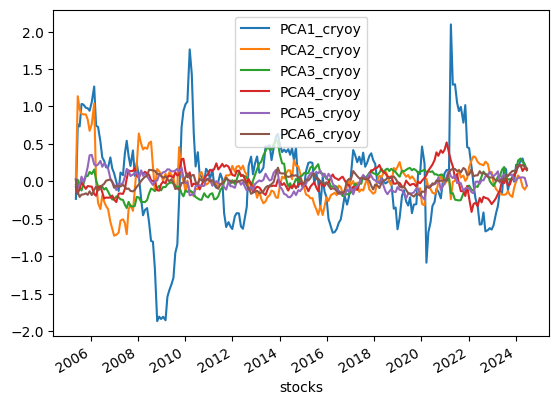

In [12]:
pca_cryoy_df.plot()

### 热力图

<Axes: xlabel='stocks'>

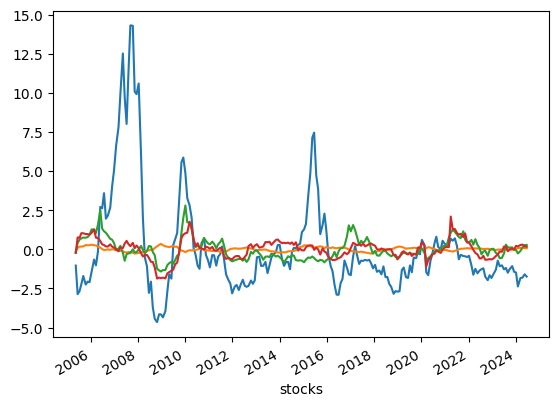

In [13]:
pca_styoy_df['PCA1_styoy'].plot()
pca_deyoy_df['PCA1_deyoy'].plot()#
pca_gdyoy_df['PCA1_gdyoy'].plot()
pca_cryoy_df['PCA1_cryoy'].plot()

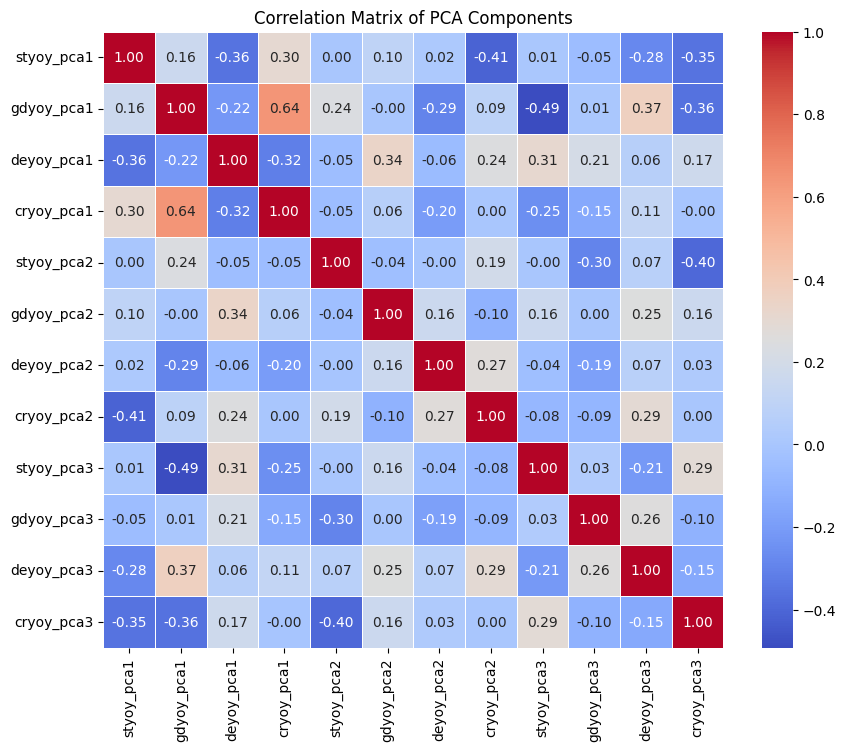

In [14]:
#热力图构建
pca_data = {
    'styoy': pca_styoy_df.iloc[:, :3],
    'gdyoy': pca_gdyoy_df.iloc[:, :3],
    'deyoy': pca_deyoy_df.iloc[:, :3],
    'cryoy': pca_cryoy_df.iloc[:, :3]
}

# 构建新的 DataFrame 按照指定顺序
pca_components = pd.DataFrame()
for i in range(1, 4):  # 假设取前三个主成分
    for asset, df in pca_data.items():
        col_name = f'{asset}_pca{i}'
        pca_components[col_name] = df[f'PCA{i}_{asset}']

# 计算相关系数矩阵
corr_matrix = pca_components.corr()

# 绘制热力图
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of PCA Components')
plt.show()

<Axes: xlabel='stocks'>

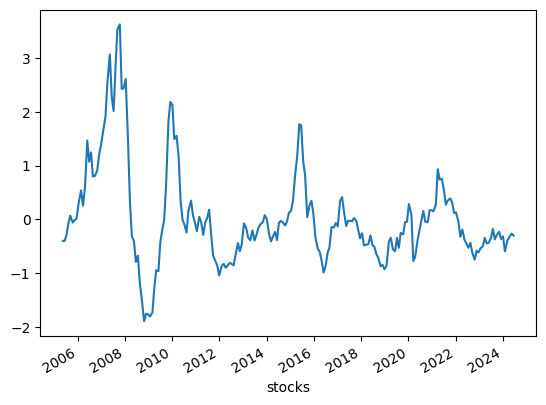

In [15]:
#市场因子
market_factor_1 = (pca_styoy_df['PCA1_styoy'] + pca_deyoy_df['PCA1_deyoy'] + (pca_gdyoy_df['PCA1_gdyoy']) + (pca_cryoy_df['PCA1_cryoy']))/4
market_factor_1.plot()

In [16]:
market_factor_1.to_csv('market_factor_1.csv', index=False)